In [1]:
#%pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import re

In [3]:
DATA_PATH = "../all-mias/"
pd.DataFrame(cv2.imread(DATA_PATH+"mdb001.pgm",-1).flatten()).value_counts()

0      609613
2       21527
3       20647
1       19732
4       15973
        ...  
217       107
218        54
219        30
220        11
221         4
Name: count, Length: 222, dtype: int64

In [4]:
def read_pgm(filename, byteorder='>'):
    """Return image data from a raw PGM file as numpy array.

    Format specification: http://netpbm.sourceforge.net/doc/pgm.html

    """
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


In [5]:
def three_dig_num(n : int) -> str:
    if n<10: return "00"+str(n)
    elif n<100: return "0" + str(n)
    else: return str(n)

In [6]:
img_dict = dict()

n = 322
for i in range(1,n+1):
    title = "mdb"+three_dig_num(i)
    img_dict[title] = DATA_PATH + f"{title}.pgm"

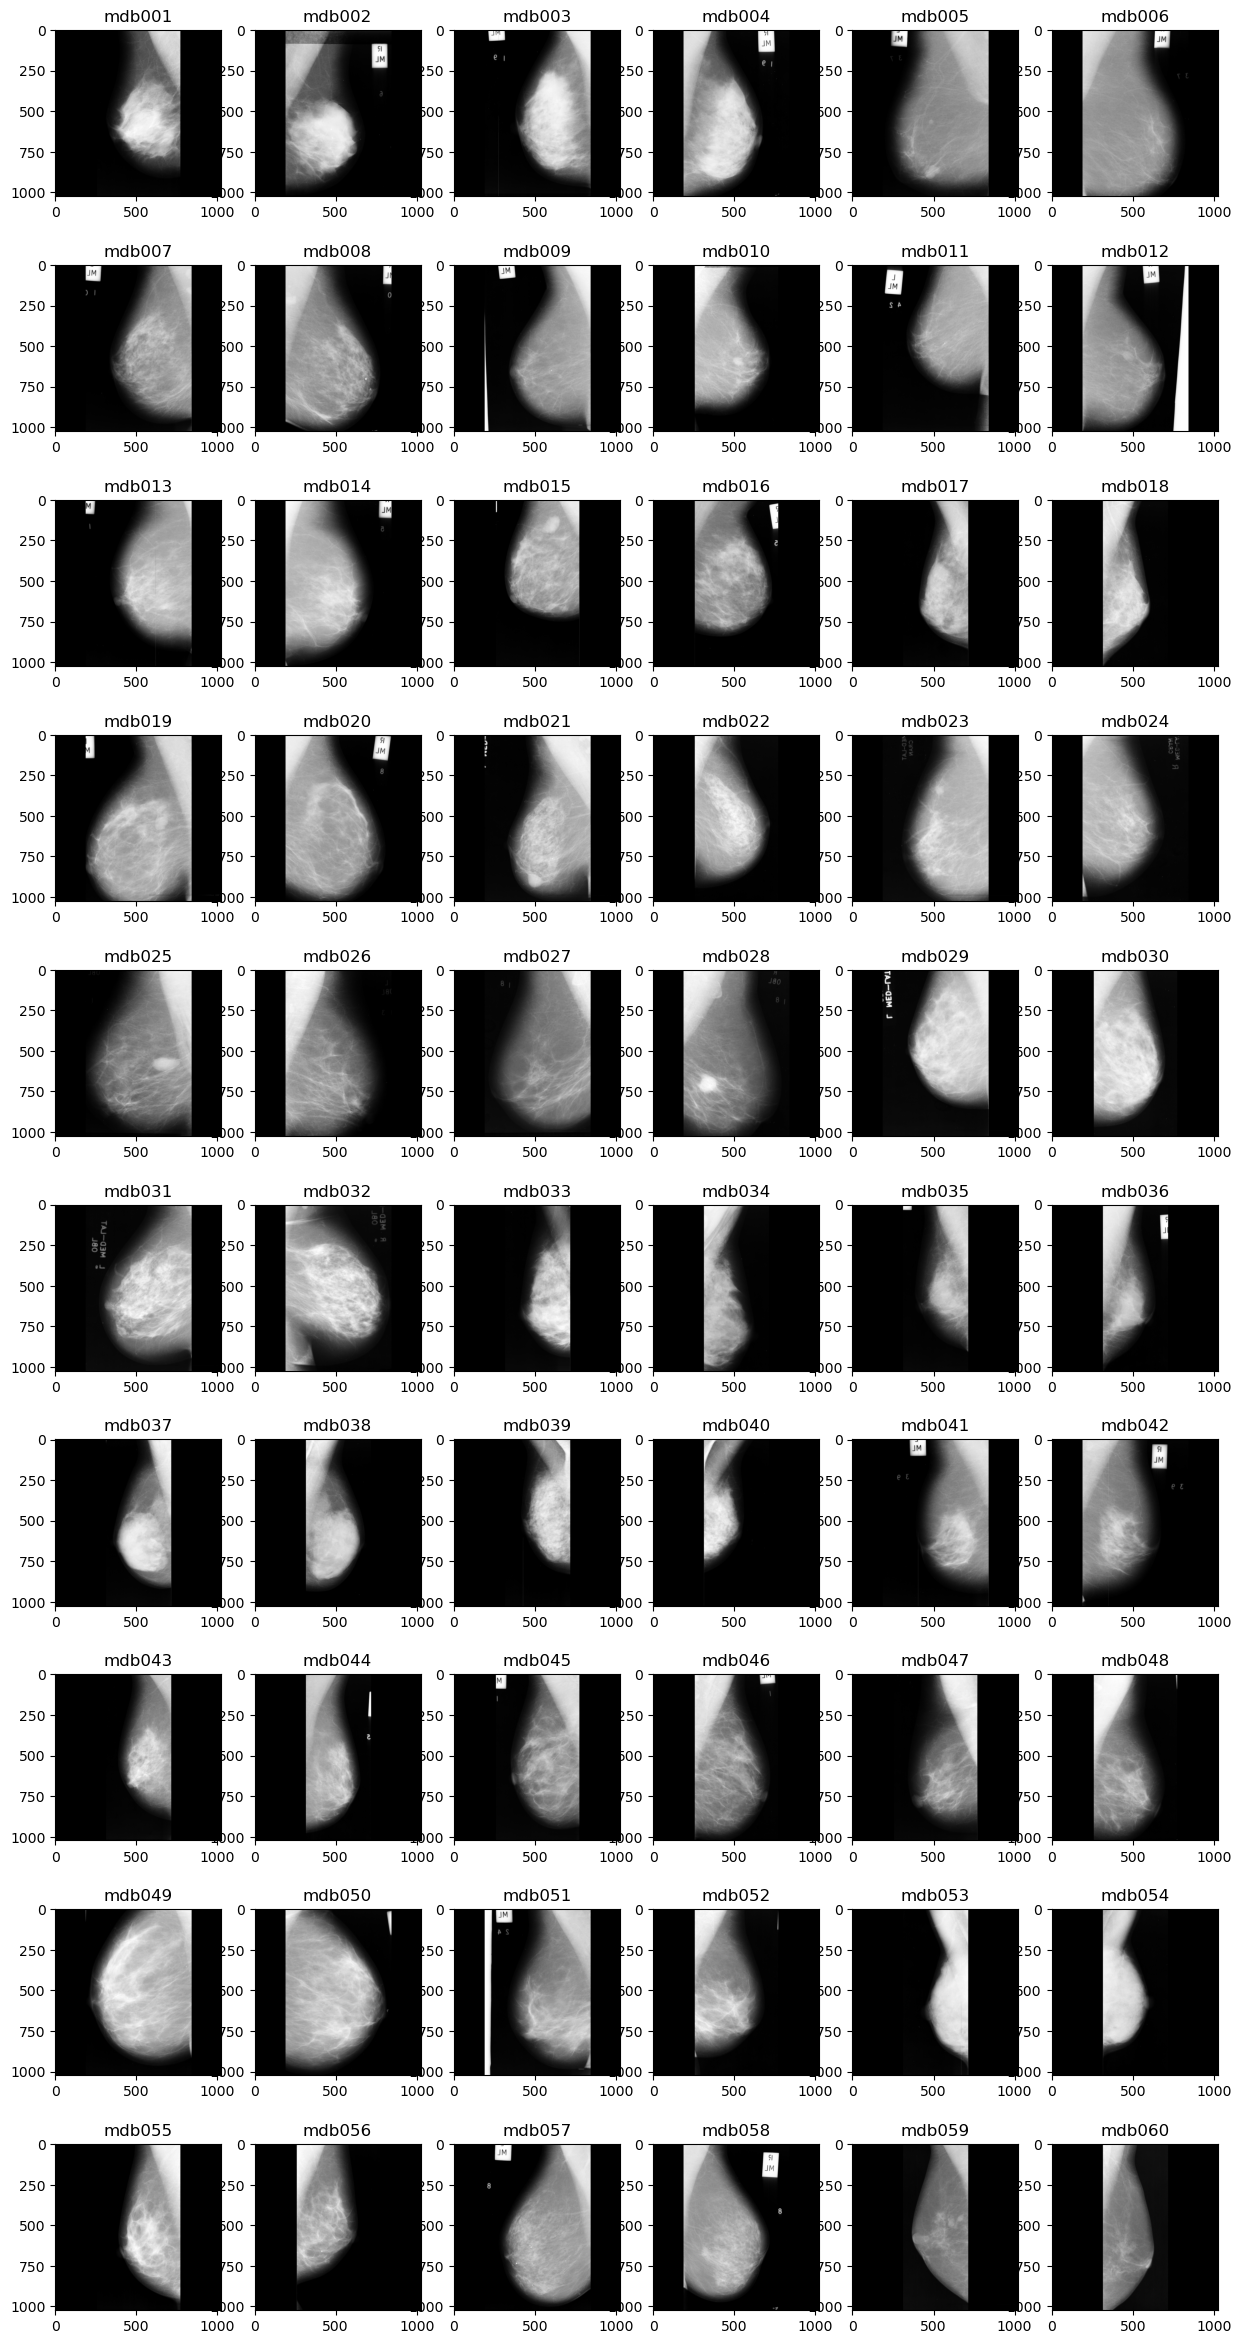

In [7]:
fig = plt.figure(figsize=(15, 30))
columns = 6
rows = 10
keyslist = list(img_dict.keys())
valueslist = list(img_dict.values())
for i in range(1, columns*rows +1): 
    fig.add_subplot(rows, columns, i).set_title(keyslist[i-1])
    plt.imshow(read_pgm(valueslist[i-1], byteorder='<'), plt.cm.gray)
plt.savefig("60img.png")
plt.show()

In [8]:
arr = []
with open(os.path.join(DATA_PATH, "Info.txt")) as f:
    all_info = str(f.read())
    data_info = all_info[all_info.index("mdb001"):all_info.index("mdb322 D NORM")+13]
    
    for r in data_info.split("\n"):
        if(r[-1] == " "): r = r[:-1]
        sp_r = r.split(" ")
        if(len(sp_r) == 3): 
            for _ in range(4):
                sp_r.append("NaN")
        arr.append(sp_r)
arr

[['mdb001', 'G', 'CIRC', 'B', '535', '425', '197'],
 ['mdb002', 'G', 'CIRC', 'B', '522', '280', '69'],
 ['mdb003', 'D', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb004', 'D', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb005', 'F', 'CIRC', 'B', '477', '133', '30'],
 ['mdb005', 'F', 'CIRC', 'B', '500', '168', '26'],
 ['mdb006', 'F', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb007', 'G', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb008', 'G', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb009', 'F', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb010', 'F', 'CIRC', 'B', '525', '425', '33'],
 ['mdb011', 'F', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb012', 'F', 'CIRC', 'B', '471', '458', '40'],
 ['mdb013', 'G', 'MISC', 'B', '667', '365', '31'],
 ['mdb014', 'G', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb015', 'G', 'CIRC', 'B', '595', '864', '68'],
 ['mdb016', 'G', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],
 ['mdb017', 'G', 'CIRC', 'B', '547', '573', '48'],
 ['mdb018', 'G', 'NORM', 'NaN', 'NaN', 'NaN', 'NaN'],


In [9]:
for i in arr:
    if(len(i) != 7): print(i)

['mdb059', 'F', 'CIRC', 'B']
['mdb216', 'D', 'CALC', 'M', '*NOTE', '3*']
['mdb233', 'G', 'CALC', 'M', '*NOTE', '3*']
['mdb245', 'F', 'CALC', 'M', '*NOTE', '3*']


Yukarıdaki mdb görselleri anladığım kadarıyla belli, küçük bir bölgede değil neredeyse görselin tamamında patolojiyi barındırıyor. Tam olarak anlayamadım ama şimdilik datasetten kaldırıyorum.

In [10]:
for i in arr:
    if(len(i) != 7): arr.remove(i)
dataset_df = pd.DataFrame(arr, columns=["Image Name", "Character of Background Tissue","Abnormality Class", "Severity", "x-coordinate","y-coordinate","radius of circle"])
dataset_df

,Image Name,Character of Background Tissue,Abnormality Class,Severity,x-coordinate,y-coordinate,radius of circle
0,mdb001,G,CIRC,B,535,425,197
1,mdb002,G,CIRC,B,522,280,69
2,mdb003,D,NORM,NaN,NaN,NaN,NaN
3,mdb004,D,NORM,NaN,NaN,NaN,NaN
4,mdb005,F,CIRC,B,477,133,30
...,...,...,...,...,...,...,...
321,mdb318,D,NORM,NaN,NaN,NaN,NaN
322,mdb319,D,NORM,NaN,NaN,NaN,NaN
323,mdb320,D,NORM,NaN,NaN,NaN,NaN
324,mdb321,D,NORM,NaN,NaN,NaN,NaN


In [11]:
relevant_path_list = []
for mdb in dataset_df["Image Name"]:
    relevant_path_list.append(img_dict[str(mdb)])
relevant_path_df = pd.DataFrame(relevant_path_list, columns=["File Path"])
full_df = pd.concat([dataset_df,relevant_path_df],axis=1)
full_df

,Image Name,Character of Background Tissue,Abnormality Class,Severity,x-coordinate,y-coordinate,radius of circle,File Path
0,mdb001,G,CIRC,B,535,425,197,../all-mias/mdb001.pgm
1,mdb002,G,CIRC,B,522,280,69,../all-mias/mdb002.pgm
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb003.pgm
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb004.pgm
4,mdb005,F,CIRC,B,477,133,30,../all-mias/mdb005.pgm
...,...,...,...,...,...,...,...,...
321,mdb318,D,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb318.pgm
322,mdb319,D,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb319.pgm
323,mdb320,D,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb320.pgm
324,mdb321,D,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb321.pgm


### Column Temizlemesi

* Character of Background tissue silinecek
* Abnormality class sütunu CALC, MASS ve NORM olarak 3 e ayrılacak, mass tipleri MASS altında birleştirilecek
* İnternetten yaptığım araştırmaya göre ARCH (Architectural distortion) ve ASYM (Asymmetry) tam olarak mass değiller, biraz daha araştırılabilir ama anladığım kadarıyla, bizim bakmamız gereken patolojiler değil o yüzden silmem gerekecek.

In [12]:
full_df = full_df.drop(columns=["Character of Background Tissue"])

In [13]:
full_df[["Abnormality Class"]].value_counts()


Abnormality Class
NORM                 207
CALC                  27
CIRC                  24
ARCH                  19
SPIC                  19
ASYM                  15
MISC                  15
Name: count, dtype: int64

İnternetten yaptığım araştırmaya göre ARCH (Architectural distortion) ve ASYM (Asymmetry) tam olarak mass değiller, biraz daha araştırılabilir ama anladığım kadarıyla, bizim bakmamız gereken patolojiler değil o yüzden silmem gerekecek.

In [14]:

full_df = full_df.drop(full_df[(full_df["Abnormality Class"] == "ASYM") | (full_df["Abnormality Class"] == "ARCH")].index)


In [15]:
full_df = full_df.reset_index(drop=True)

In [16]:
full_df

,Image Name,Abnormality Class,Severity,x-coordinate,y-coordinate,radius of circle,File Path
0,mdb001,CIRC,B,535,425,197,../all-mias/mdb001.pgm
1,mdb002,CIRC,B,522,280,69,../all-mias/mdb002.pgm
2,mdb003,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb003.pgm
3,mdb004,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb004.pgm
4,mdb005,CIRC,B,477,133,30,../all-mias/mdb005.pgm
...,...,...,...,...,...,...,...
287,mdb318,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb318.pgm
288,mdb319,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb319.pgm
289,mdb320,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb320.pgm
290,mdb321,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb321.pgm


In [17]:
new_abnormality_class_list = []
for i,ac in enumerate(full_df["Abnormality Class"]):
    if ac in "CIRC MISC SPIC":
        new_abnormality_class_list.append("MASS")
    elif ac == "CALC":
        new_abnormality_class_list.append("CALC")
    elif ac == "NORM":
        new_abnormality_class_list.append("NORM")
    else:
        new_abnormality_class_list.append(ac)
print(len(new_abnormality_class_list))
full_df["Abnormality Class"] = pd.Series(data = new_abnormality_class_list)
full_df[["Abnormality Class"]].value_counts()

292


Abnormality Class
NORM                 207
MASS                  58
CALC                  27
Name: count, dtype: int64

In [18]:
full_df

,Image Name,Abnormality Class,Severity,x-coordinate,y-coordinate,radius of circle,File Path
0,mdb001,MASS,B,535,425,197,../all-mias/mdb001.pgm
1,mdb002,MASS,B,522,280,69,../all-mias/mdb002.pgm
2,mdb003,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb003.pgm
3,mdb004,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb004.pgm
4,mdb005,MASS,B,477,133,30,../all-mias/mdb005.pgm
...,...,...,...,...,...,...,...
287,mdb318,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb318.pgm
288,mdb319,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb319.pgm
289,mdb320,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb320.pgm
290,mdb321,NORM,NaN,NaN,NaN,NaN,../all-mias/mdb321.pgm


### Patolojiyi Yuvarlak içine alma

In [19]:
#cv2.imshow("Image",read_pgm(valueslist[i-1], byteorder='<'))
#image = cv2.imread("mdb001.pgm",-1)
#cv2.imshow("Image",image)
#image

In [20]:
full_df[full_df["Image Name"]=="mdb002"]["File Path"].reset_index(drop=True)[0]


'../all-mias/mdb002.pgm'

In [21]:
full_df[full_df["Abnormality Class"] =="CALC"]

,Image Name,Abnormality Class,Severity,x-coordinate,y-coordinate,radius of circle,File Path
176,mdb209,CALC,M,647,503,87,../all-mias/mdb209.pgm
178,mdb211,CALC,M,680,327,13,../all-mias/mdb211.pgm
179,mdb212,CALC,B,687,882,3,../all-mias/mdb212.pgm
180,mdb213,CALC,M,547,520,45,../all-mias/mdb213.pgm
181,mdb214,CALC,B,582,916,11,../all-mias/mdb214.pgm
184,mdb218,CALC,B,519,629,8,../all-mias/mdb218.pgm
185,mdb219,CALC,B,546,756,29,../all-mias/mdb219.pgm
188,mdb222,CALC,B,398,427,17,../all-mias/mdb222.pgm
189,mdb223,CALC,B,523,482,29,../all-mias/mdb223.pgm
190,mdb223,CALC,B,591,529,6,../all-mias/mdb223.pgm


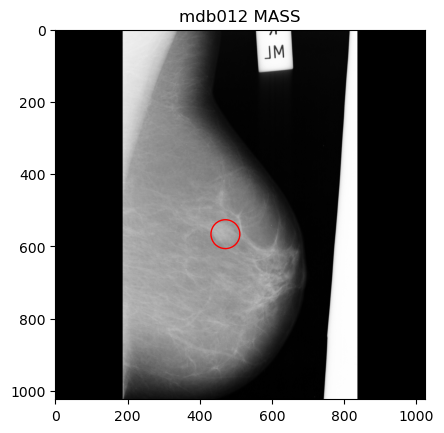

In [25]:
img_data = full_df[full_df["Image Name"]=="mdb209"]
image_path = img_data["File Path"].reset_index(drop=True)[0]

from matplotlib.patches import Circle
fig,ax = plt.subplots(1)
ax.set_aspect("equal")

plt.title(img_data["Image Name"].reset_index(drop=True)[0] + " "+img_data["Abnormality Class"].reset_index(drop=True)[0])
ax.imshow(read_pgm(image_path, byteorder='<'), plt.cm.gray)

try:
    x,y,r = int(img_data["x-coordinate"].reset_index(drop=True)[0]), 1024-int(img_data["y-coordinate"].reset_index(drop=True)[0]), int(img_data["radius of circle"].reset_index(drop=True)[0])
    ax.add_patch(Circle((x,y),r,fill=False,color="red"))
except:
    pass

plt.savefig(img_data["Image Name"].reset_index(drop=True)[0]+".svg")
plt.show()

Not: Yuvarlak içine almada verilen y koordinatları ters verilmiş yani 1024ten(dikey pixel sayısı) çıkarınca anlamlı oluyor ancak.

Not: Kalsifikasyonların yuvarlak içine alınmasında hala bir gariplik var çözemedim

Not: matplotlib in plt.savefig() fonksiyonunu kullanarak bu daire içine aldığımız görüntüleri kaydedebiliyoruz ama png, jpg gibi formatlarda kaydediliyor, asıl datasetin olduğu pgm formatında kaydetme yok, belki plt.savefig() fonksiyonunun kabul ettiği diğer formatlar arasında pgm ye benzer olacak ve/veya kaydederken oluşabilecek veri kaybını en aza/sıfıra indirecek bir format vardır, bunları araştırarak doğrusunu seçmek lazım. Eğer yoksa cv2 kütüphanesiyle görsele yuvarlak eklemeyi ve kaydetmeyi deneyebiliriz, ben biraz baktım ama yapamadım pgm formatını okutmayı. Biraz daha bakılabilir, bir yolu olmalı diye düşünüyorum.

Not: Bu format svg olabilir, png ve jpg ye göre daha iyi duruyor şimdilik